<a href="https://colab.research.google.com/github/Kandeo/Gender-Inequality---Olympics-/blob/main/Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLYMPICS AND GENDER EQUALITY**

**Overview**

The Olympic Games are considered the world's foremost sports competition with more than 200 nations participating. With the competitions happening every four years, these games regularly draw global audiences in the billions to watch coverage of athletes from hundreds of nations. 

Having been founded in 1894, the games were mainly  reserved for male athletes. It is only in the 1900 that women started being admitted as participants but excluded from showpiece events of track and field. In an effort to combat the effects of gender, the presence of women in every sport was made mandatory from the year 2007 leading to an increase in the rate of participation of women in the games. 
As improvements in gender equality in sports continue to be made a representation of 50% needs to be achieved. 

This research therefore seeks to analyse the participation of women in Olympic Games over the years and find answers to:

Objectives:
1. Partcipation of men and women in the games over the years
2. Top countries that have participated in the olympics since inception
3. Age distribution of the Participants
4. Trend Participation of men and women
5. Height and Weight distribution by sport 


Dataset: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results 

# **Defining the Question**

**Specific Data Analytics question**

This analysis seeks to find out how Olympics has evolved over time for women in terms of their participation

**Metrics for Success**

Gathering insights on how Olympics has evolved over time for women

**Understanding the Context**

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016 of all participating countries. Information captured is on the name of the Athelete, Age, Height, Weight, Sporting activity and the Medal won.

The sporting activities are held in 2 seasons: Summer and Winter. Winter Olympics are held during winter, and played every four years. The games that are played are held on the coldness of snow or ice. The Summer Olympics on the other hand occur in summer, which enables more sporting events due to the conducive weather conditions.


**Experimental Design**

1. Data Loading
   - Loading libraries

2. Data Cleaning
   - Joining of the datasets
   - Handling missing/duplicate values
   - Dealing with irrelevant observations
   - Check for outliers and anomalies

3. Exploratory Data Analysis
   - Univariate analysis
   - Bivariate analysis

4. Hypothesis testing
   - Stating the hypothesis
   - Identifying the test statistic
   - Analysis and recommendations

5. Conclusions

**Data Relevance**

- **Name**: Name of the participant/athlete
- **Sex**: Male or Female
- **Season**: Summer or Winter
- **Medal**: Gold, Silver, Bronze, None
- **Sport**: Type of Sporting Activity
- **Region**: Country of Origin

# **Data Loading**

In [ ]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the first dataset on atheletes and the events:
Atheletes = pd.read_csv('athlete_events.csv')
Atheletes.head(4)


ID                  Name Sex  ...       Sport                         Event  Medal
0   1             A Dijiang   M  ...  Basketball   Basketball Men's Basketball    NaN
1   2              A Lamusi   M  ...        Judo  Judo Men's Extra-Lightweight    NaN
2   3   Gunnar Nielsen Aaby   M  ...    Football       Football Men's Football    NaN
3   4  Edgar Lindenau Aabye   M  ...  Tug-Of-War   Tug-Of-War Men's Tug-Of-War   Gold

[4 rows x 15 columns]

In [ ]:
#Checking the shape:
Atheletes.shape

(271116, 15)

In [ ]:
#Loading the second dataset on regions:
Regions= pd.read_csv('noc_regions.csv')
Regions.head(4)

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN

In [ ]:
#Checking the Dataset:
Regions.shape

(230, 3)

# **Data Cleaning**

Joining the 2 datasets 

In [ ]:
#Joining the 2 datasets using left join on the NOC column:
Final = Atheletes.merge(Regions, how = 'left', on= 'NOC')
Final.head(4)

ID                  Name Sex  ...  Medal   region  notes
0   1             A Dijiang   M  ...    NaN    China    NaN
1   2              A Lamusi   M  ...    NaN    China    NaN
2   3   Gunnar Nielsen Aaby   M  ...    NaN  Denmark    NaN
3   4  Edgar Lindenau Aabye   M  ...   Gold  Denmark    NaN

[4 rows x 17 columns]

Missing and Duplicate values

In [ ]:
#Checking for missing values:
Final.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [ ]:
#Dealing with null values
#Filling the null values in Age, height and weight with the median values:
Final['Age'].fillna((Final['Age'].median()), inplace= True)
Final['Height'].fillna((Final['Height'].median()), inplace= True)
Final['Weight'].fillna((Final['Weight'].median()), inplace= True)


In [ ]:
#Checking for duplicates:
Final.duplicated().sum()
#The data has 1,385 Duplicates. Dropping them:
Final.drop_duplicates(inplace=True)
Final.duplicated().sum()

0

Irrelevant observations

In [ ]:
#Dropping the rows with missing values in regions:
Finals = Final.dropna(axis=0, subset=['region'])
Finals.head(4)

ID                  Name Sex  ...  Medal   region  notes
0   1             A Dijiang   M  ...    NaN    China    NaN
1   2              A Lamusi   M  ...    NaN    China    NaN
2   3   Gunnar Nielsen Aaby   M  ...    NaN  Denmark    NaN
3   4  Edgar Lindenau Aabye   M  ...   Gold  Denmark    NaN

[4 rows x 17 columns]

In [ ]:
#Dropping columns not needed in the analysis[NOC, Games and Notes]:
Finals.drop(Finals.columns[[7, 8, 16]], axis=1, inplace = True)
Finals.head()


ID                      Name  ... Medal       region
0   1                 A Dijiang  ...   NaN        China
1   2                  A Lamusi  ...   NaN        China
2   3       Gunnar Nielsen Aaby  ...   NaN      Denmark
3   4      Edgar Lindenau Aabye  ...  Gold      Denmark
4   5  Christine Jacoba Aaftink  ...   NaN  Netherlands

[5 rows x 14 columns]

Since we are intrested with participation over the years, the missing values in the Medal column are not dropped as this covers people who did not win any medal

Exporting the dataset

In [ ]:
#Exporting the clean dataset:
Final1.to_csv('OlympicGames(1896-2016).csv')

# **Exploratory Data Analysis**

**Univariate Analysis**

We perform this analysis with an aim of describing the data in terms of:

1. Participation of Men and Women 

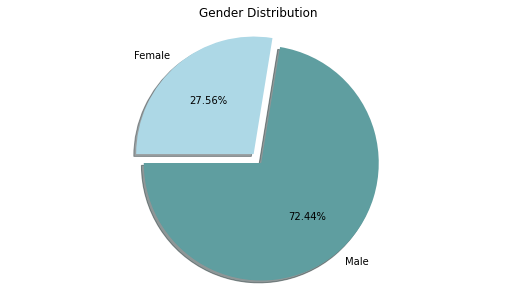

In [ ]:
#To find participation of men and women:
Gender = Finals['Sex'].value_counts()
Gender
# Female: 195,119      Male: 74,242

#Visualising the information on a pie chart:
labels= ['Male','Female']
colors=['cadetblue', 'lightblue']
plt.figure(figsize= (9, 5))
plt.title('Gender Distribution')
plt.pie(Gender,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()



Since the inception of Olympics, we have more number of Male participants than Females

2. Top participating Countries

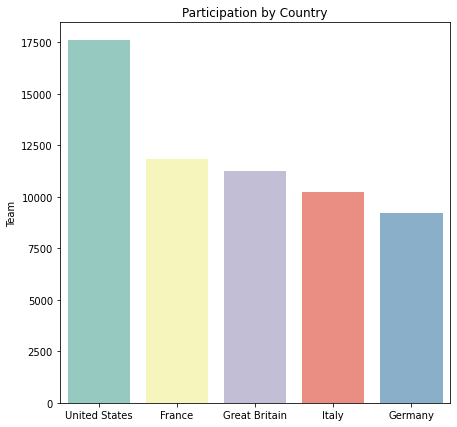

In [ ]:
#Top participating countries:
Tops = Finals.Team.value_counts().sort_values(ascending=False).head(5)
Tops
#USA, 17,598  France 11,817  Great Britain 11,264  Italy 10,213  Germany 9,230

#Plotting the top participants:
plt.figure(figsize= (7,7))
plt.title('Participation by Country')
sns.barplot(x=Tops.index, y=Tops, palette='Set3');

USA followed by France are the top countries that have participated in the Olympics since 1896

3. Season with the most Sporting activities

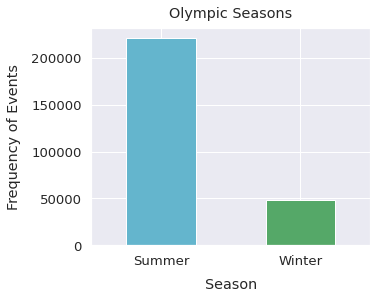

In [ ]:
#To view the season with the most sporting activities
sns.set(font_scale=1.2)
Finals['Season'].value_counts().plot(kind='bar', figsize=(5, 4), rot=0, color= ('C9','C2'))
plt.xlabel("Season", labelpad=10)
plt.ylabel("Frequency of Events", labelpad=10)
plt.title("Olympic Seasons", y=1.02);


Summer Olympics have a higher number of events and sports as compared to the Winter Olympics.

4. Age Distribution

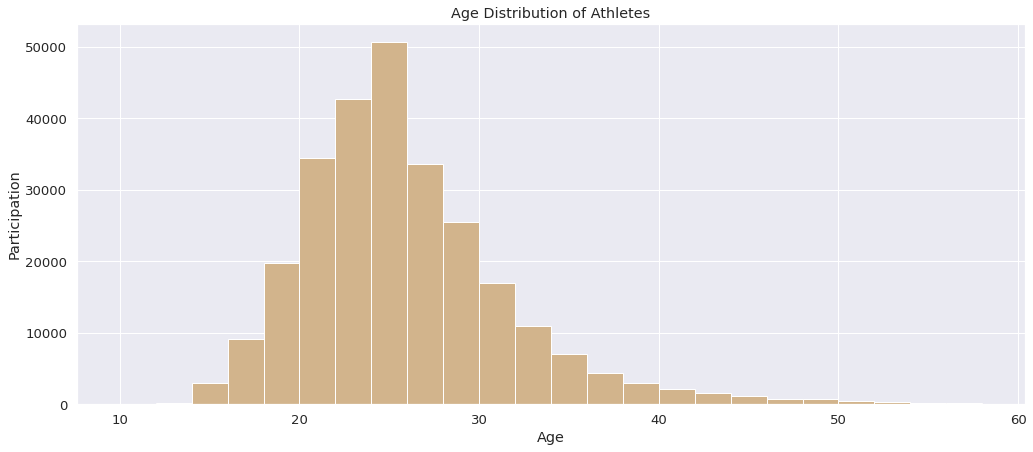

In [ ]:
#Age distribution of the most atheletes:
plt.figure(figsize= (17, 7))
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Participation')
plt.hist(Finals.Age, bins= np.arange(10, 60, 2), color='tan', edgecolor='white');

Most athletes are between the ages of 20 to 30 with majority falling between 24-26 years

5. Weight distribution

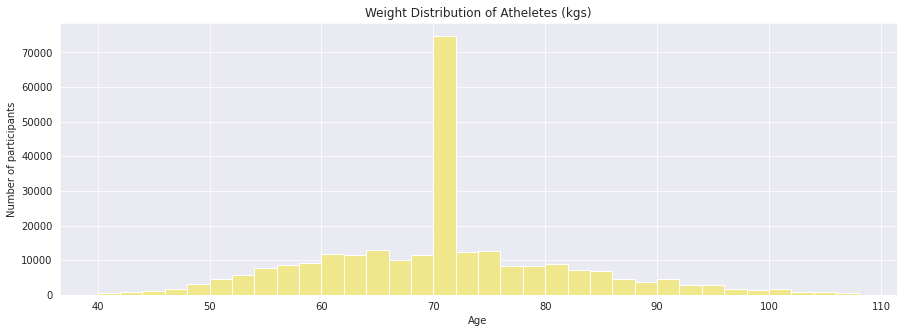

In [ ]:
#To view the weight distribution of the participants:
plt.figure(figsize= (15, 5))
plt.title('Weight Distribution of Atheletes (kgs)')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(Finals.Weight, bins= np.arange(40, 110, 2), color='khaki', edgecolor='white');

Most atheletes weigh between 70-72Kgs

6. Descriptive Analysis

In [ ]:
#Descriptive analysis:
Finals.describe()

ID            Age  ...         Weight           Year
count  269361.000000  269361.000000  ...  269361.000000  269361.000000
mean    68246.180293      25.407420  ...      70.547756    1978.605114
std     39022.083828       6.061089  ...      12.612287      29.758197
min         1.000000      10.000000  ...      25.000000    1896.000000
25%     34643.000000      22.000000  ...      63.000000    1960.000000
50%     68208.000000      24.000000  ...      70.000000    1988.000000
75%    102096.000000      28.000000  ...      76.000000    2002.000000
max    135571.000000      97.000000  ...     214.000000    2016.000000

[8 rows x 5 columns]

The average Age, Height and Weight for the participants is 25 Years, 175cms and 70kgs respectively

**Findings**

From this analysis;
- Male Participation in the games has always been higher in comparison to Female athletes.
- USA has the highest number of participants in the Olympics since its inception.
- As much as majority of the athletes are aged between 20-30 Years, participation can also be noted on those aged 50 and above showing that age is not a limiting factor in ones participation
- Most participants were found to be 70-72kgs of weight. 

Recommendations;
 - Continuous actions should be made to advance gender equality in sports.
 - Since Age is not a limting factor in participation, mass participation in sports can be taken up with countries.


**Bivariate Analysis**

This analysis seeks to establish statistical relationships and address questions on:

1. Gender with most medals

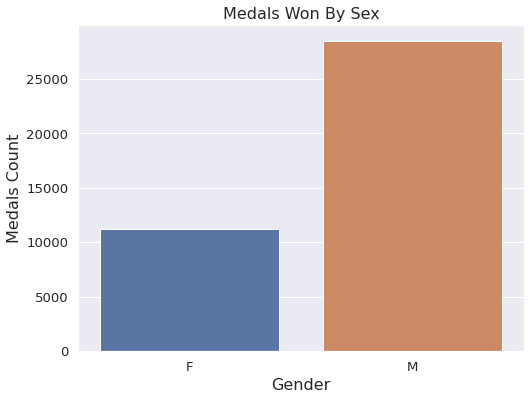

In [ ]:
#To view medals won by the genders:
C = pd.DataFrame(Finals.groupby('Sex')['Medal'].count().reset_index(name = 'MedalsWon'))
C
#Females 11,246   Males 28,517

#Visualizing the above information:
#colors=['cadetblue', 'lightblue']
fig = plt.figure(figsize=(8,6))
sns.barplot(x = 'Sex', y = 'MedalsWon', data=C)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Medals Count', fontsize=16)
plt.title('Medals Won By Sex',fontsize=16)
plt.show()


Most Medals have been won by men. This is due to the low participation in women

2. Women participation in the Olympics over the years 

In [ ]:
#Top number of female atheletes in each olympics:
F=Finals[(Finals.Sex == 'F') & (Finals.Season == 'Summer')][['Sex', 'Year']]
F=F.groupby('Year').count().reset_index()
F.tail(5)

Year   Sex
23  2000  5418
24  2004  5531
25  2008  5792
26  2012  5790
27  2016  6198

6,198 Females participated in the Rio Olympics 2016 making it the highest record reached since inception

2. Trend chart on the Participation of Men and Women over the years 

In [ ]:
Summer = Finals[Finals['Season'] == 'Summer']
Summer

#Viewing the trend in participation by Sex;
T =Summer.groupby(['Sex', 'Year']).size().reset_index().pivot(columns='Sex', index='Year', values=0).reset_index()
T.head()

#Plotting the trend:
x=T['Year']
y1=T['F']
y2=T['M']
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(specs = [[{'secondary_y': True}]])
fig.add_trace(go.Scatter(x=x,y=y1,mode='lines+markers', name='Female', line=dict(color='olive', width=2)),secondary_y=False,)
fig.add_trace(go.Scatter(x=x,y=y2,mode='lines+markers', name='Male', line=dict(color='cadetblue', width=2)),secondary_y=True,)
fig.update_layout(title='Number of Males and Females over time', xaxis_title='Year')
fig.show()

Gradually, women participation in the Olympic games has increased since 1900's. In as much as this is happening, participaton is still higher among Males

3. Relationship between Age, Weight and Height of Atheletes

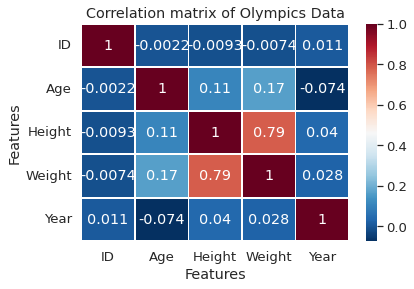

In [ ]:
#To find the correlation between the ages, weight and height of atheletes:
Corr = Finals.corr(method='pearson')
Corr

import seaborn as sb

#Visualizing this for comparisons:
sb.heatmap(Corr, xticklabels=Corr.columns, yticklabels=Corr.columns, cmap='RdBu_r', annot=True, linewidth=0.7)
plt.title("Correlation matrix of Olympics Data")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

A strong relationship of 0.79 exists between the Height and Weight of an Athlete. 

4. Relationship between Height and weight by Sex

Text(0.5, 1.0, 'Height vs Weight Olympic Participant')

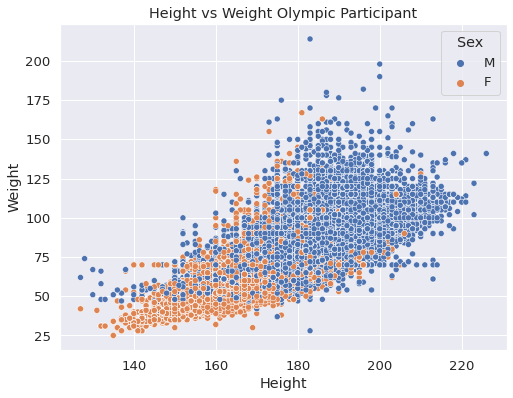

In [ ]:
#Viewing the relationship between Height and Weight of atheletes by sex:

not_null_HW = Finals[(Finals['Height'].notnull()) & (Finals['Weight'].notnull())]
plt.figure(figsize=(8,6))
sns.scatterplot(x='Height',y='Weight',data=not_null_HW, hue='Sex')
plt.title('Height vs Weight Olympic Participant')


The relationship between Height and Weight is similar across both genders

 Distribution of Height and Weight based on Sport

In [ ]:
#To compare the height and weight by sport for athletes:
import plotly.express as px
fig= px.scatter(Final1, x='Weight', y='Height', color='Sport')
fig.update_layout(title= 'Distribution of Height and Weight By Sport')
fig.show()


**Findings**

From the analysis;
- The number of women competing at the Olympic Games has increased significantly since 1900's.
- A strong relationship exists between the height and weight of an athlete 
- Males have the highest number of gold medas won


Recommendations
- Initiatives should be made towards attaining a full gender representation in the coming years.
- Equal opportunities should be promoted for women to win medals through increasing the number of medal events for female athletes.


# **Hypothesis Testing**

The Ministry of sports has been looking on ways to promote mass participation in sports through initiating a gender-balanced event programme. In line with that, they seek to identify the age groups between the genders that fit as their target audience for sensitization. We have been tasked to find out if the average age of athletes who win gold medals is the same for both Males and Females

**Step 1**: Stating the Hypothesis

**Ho**: There exists no significant difference in the average age of Male and Female Athletes who win Gold medals

**Ha**: There exists a significant difference in the average age of Male and Female Atheletes who win Gold medals

**Step 2**: Analysis Plan

In [ ]:
#Creating the Population Datframe of all Athletes who've won Olympics over the years:
Population = Finals.loc[Finals['Medal'].isin(['Gold']) & Finals['Sport'].isin(['Athletics'])]
Population.head()

ID                            Name  ... Medal    region
620   359  Andrey Khakimovich Abduvaliyev  ...  Gold    Russia
720   411                  Gezahgne Abera  ...  Gold  Ethiopia
787   454       Edgar Allen "Ed" Ablowich  ...  Gold       USA
915   519         Harold Maurice Abrahams  ...  Gold        UK
1511  836                     Platt Adams  ...  Gold       USA

[5 rows x 14 columns]

In [ ]:
#Describing the Population:
Population['Age'].describe()

count    1339.000000
mean       25.003734
std         3.944020
min        15.000000
25%        22.000000
50%        24.000000
75%        28.000000
max        41.000000
Name: Age, dtype: float64

The Mean age of the Population is 25 years

**Step 3**: Choosing The Level of Confidence and Test Statistic

For this analysis, a 2 Sample Z test will be used to test the claim. The test is 2 tailed with a critical region of + or - 1.960

The level of significance/Alpha is 5% while Confidence level is 95%

**Step 4**: Validating the data meets the conditions needed to perform a Z Test:

1. Sample is randomly selected and greater than 30

The sample size is selected using Stratified Random Sampling

In [ ]:
# Generating a Stratified random sample of 20%:
Sample = Population.groupby('Sex', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(n=200))
Sample.head(5)


ID                                    Name  ... Medal     region
156892   78805                      Nouria Mrah-Benida  ...  Gold    Algeria
200278  100577                    Karin Richert-Balzer  ...  Gold    Germany
99445    50335            Denean Elizabeth Howard-Hill  ...  Gold        USA
230656  115768  Shirley Barbara Strickland de la Hunty  ...  Gold  Australia
198111   99470          Heike Redetzky-Henkel (-Meier)  ...  Gold    Germany

[5 rows x 14 columns]

In [ ]:
#Describing the data:
Sample['Age'].describe()

count    400.000000
mean      25.507500
std        4.277931
min       16.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       39.000000
Name: Age, dtype: float64

Mean Age of the Sample is 26

Creating The 2 stratified samples;

The first sample will contain information on Male Athletes while the second sample will be Female Athletes

- Sample 1 = Males Athletes
- Sample 2 = Females Athletes

In [ ]:
#Sample 1 dataframe:
Males = Sample.loc[Sample['Sex'].isin(['M'])]
Males.head(5)

ID                     Name  ... Medal        region
262397  131283               Mamo Wolde  ...  Gold      Ethiopia
121088   61238  Romuald Iosifovich Klim  ...  Gold        Russia
239713  120134           Josia Thugwane  ...  Gold  South Africa
70680    35992           Bror Karl Fock  ...  Gold        Sweden
158560   79596  John Fredrik Mikaelsson  ...  Gold        Sweden

[5 rows x 14 columns]

In [ ]:
#Sample 2 dataframe:
Females = Sample.loc[Sample['Sex'].isin(['F'])]
Females.head(5)

ID                                    Name  ... Medal     region
156892   78805                      Nouria Mrah-Benida  ...  Gold    Algeria
200278  100577                    Karin Richert-Balzer  ...  Gold    Germany
99445    50335            Denean Elizabeth Howard-Hill  ...  Gold        USA
230656  115768  Shirley Barbara Strickland de la Hunty  ...  Gold  Australia
198111   99470          Heike Redetzky-Henkel (-Meier)  ...  Gold    Germany

[5 rows x 14 columns]

In [ ]:
#Testing for independency on the 2 samples:

from scipy.stats import spearmanr
spearmanr(Males['Age'], Females['Age']) 

SpearmanrResult(correlation=0.06711509414296676, pvalue=0.34503341667820264)

Since the p value is greater that 0.05, this confirms the samples to be independent of each other

In [ ]:
#Testing for Normality:
#Using shapiro:
from scipy import stats
from scipy.stats import shapiro
Check =Sample['Age']
stat, p = shapiro(Check)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.979, p=0.000
Sample does not look Gaussian


Since the sample is not normal but size is greater than 30, the test can still be conducted 

In [ ]:
#Finding the Confidence interval:
import math
Sample_Mean = Sample['Age'].mean()

z_critical = stats.norm.ppf(q = 0.975) 

print("z-critical value:")             
print(z_critical)                        

Pop_std = Population['Age'].std() 

margin_of_error = z_critical * (Pop_std/math.sqrt(198))

confidence_interval = (Sample_Mean - margin_of_error,
                       Sample_Mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(24.958143096451852, 26.056856903548148)


We are 95% confident that the mean of the population is between 24.96 and 26

**Step 5**: Calculating the Test Statistic

In [ ]:
#Finding the mean and Std for the first sample:
M1 = Males['Age'].mean()
M1      #Mean= 25.45

S1 = Males['Age'].std() 
S1

4.060781913467368

In [ ]:
#Finding the Mean and Std for the second Sample:
M2 = Females['Age'].mean()
M2    #Mean= 25.57

S2 = Females['Age'].std() 
S2

4.494080416945145

In [ ]:
#Finding the Z Test:
alpha = 0.05
n1 = Males['Age'].count() 
n2 = Females['Age'].count() 

sp = math.sqrt(((n1-1)*S1**2+(n2-1)*S2**2)/(n1+n2-2)) 
print(f"The pooled estimate of the commom stdev is: {round(sp,3)}, which is a value between {round(S1, 3)} and {round(S2,3)}")

# calculate the z-score
z = (M1-M2)/(sp*(math.sqrt((1/n1+1/n2))))
print(f"The z-score statistic is: {z}")

The pooled estimate of the commom stdev is: 4.283, which is a value between 4.061 and 4.494
The z-score statistic is: -0.26850876276970137


In [ ]:
#Finding the P-Value:
import statistics
from scipy.stats import norm

p = 1 -norm.cdf(z)
print(f"p-value is: {p}")

p-value is: 0.6058461346334385


Since the Z Value of -0.27 lies inside the critical region of 1.96 and the P-Value is greater than 0.05 we fail to reject the Null hypothesis.

There is sufficient evidence at the 0.05 level to conclude that there is no significant difference in the average age of Male and female athletes who win gold medals

**Conclusion**

The statistical decision implies that the average age of Male and Female athletes who win Gold medals is the same hence we support the claim.

Recommendations:
- Creating a more gender-balanced event programme that will reach the targeted age group.
- The government and ministry of sports  should invest in sports facilities and training for kids and youths as the average of participants stands at 25.
- Creating campaigns that bring together a range of partners and initiatives to raise the profile of women in sports so as to boost participation for women and girls.

Overall:
- Increased visibility for womens sports.
- Ensure Olympic Games participation has full gender equality across all sports, disciplines, and events with equal participation of both genders.
- Put laws that safeguard athletes against gender discrimination, harassment, and abuse.